# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model to accurately predict heart disease in a patient

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease

## 2. Data

The original data comes from the UCI heart disease dataset can download from uci or from kaggle

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features

**create a data dictionary**

* age (Age of the patient in years)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* target: the predicted attribute (1 or 0)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [1]:
# Import all the functions/libraries we need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

## Load the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with

1. What questions are you trying to solve?
2. what kind of data do we have and how do we treat different data types
3. what missing from the data and how do you deal with them?
4. Where are the outlier and why you care about them
5. how can you add, change or remove features to get more out of your data

In [4]:
# lets find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

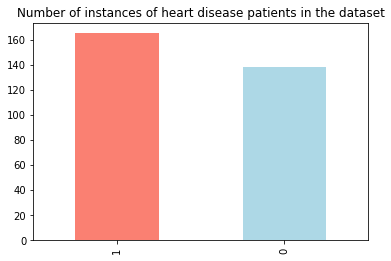

In [5]:
df["target"].value_counts().plot(kind="bar", color = ["salmon","lightblue"]);
plt.title("Number of instances of heart disease patients in the dataset");

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [9]:
df.sex.value_counts() # 1 is male, 0 is female

1    207
0     96
Name: sex, dtype: int64

In [10]:
# compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


the dataset has almost 100 woman instances and 72 of them have heart disease. We can already tell ~72% of woman in the dataset have heart disease

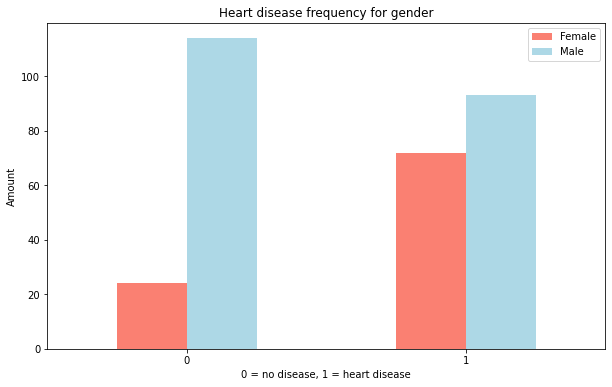

In [11]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color = ["salmon","lightblue"]);
plt.title("Heart disease frequency for gender")
plt.xlabel("0 = no disease, 1 = heart disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);


### Age vs max heart rate for heart disease

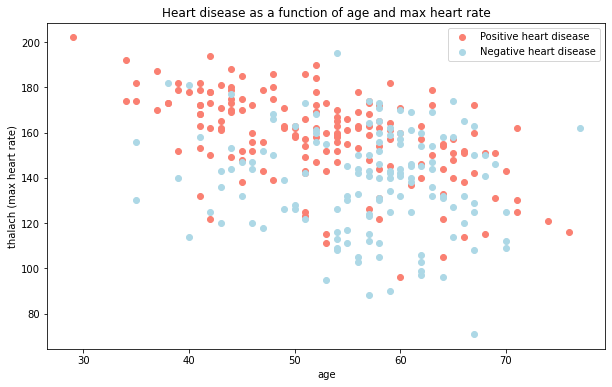

In [12]:
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

#scatter with the negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");
plt.title("Heart disease as a function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("thalach (max heart rate)");
plt.legend(["Positive heart disease","Negative heart disease"]);

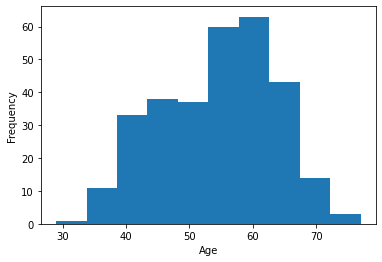

In [13]:
# check the distribution of the age column with a histogram
df.age.plot.hist();
plt.xlabel("Age");

### Heart disease frequency per chest type

0. typical angina
1. atypical angina
2. non anginal pain
3. asymptomatic

In [14]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


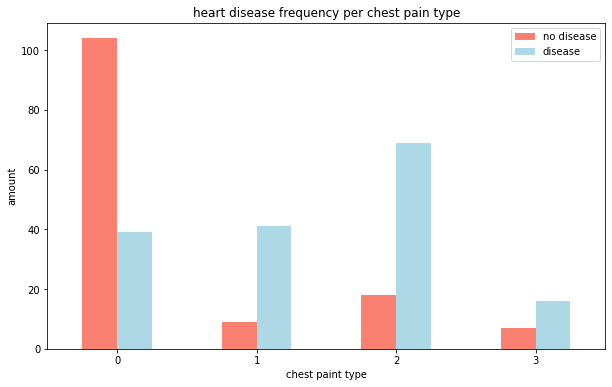

In [15]:
# make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color = ["salmon","lightblue"]);
plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest paint type")
plt.ylabel("amount")
plt.legend(["no disease","disease"])
plt.xticks(rotation=0);

In [16]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


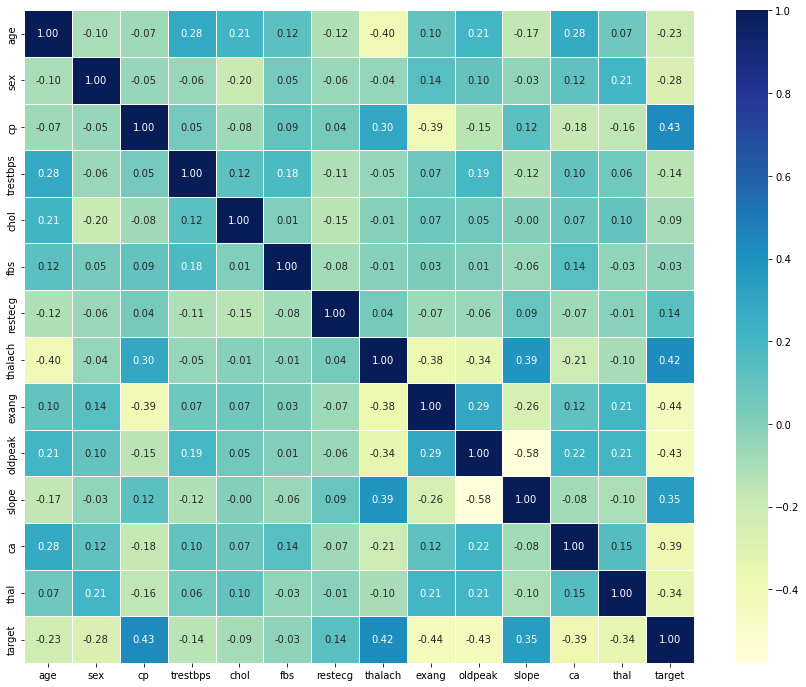

In [17]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");


In [18]:
type(corr_matrix)

pandas.core.frame.DataFrame

## 5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = df.drop("target",axis=1)
y = df["target"]

In [21]:
# Split the data into train and test sets
np.random.seed(42)

# Split into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((242, 13), (61, 13), (242,), (61,))

We are going to try 3 different machine learning models:

1. Logistic regression
2. K nearest neighbors
3. Random forest classifier
4. Linear SVC (we will not be testing this)

In [22]:
# put models in a dictionary
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models,Xtrain,Xtest,ytrain,ytest):
    '''
    Fits and evaluates given machine learning models
    models: a dict of different scikit-learn machine learning models
    Xtrain: training features data
    Xtest: testing features data
    ytrain: training labels data
    ytest: testing features data
    '''
    
    #set random seed
    np.random.seed(42)
    
    #make dictionaries to keep model scores
    model_scores = {}
    for name,model in models.items():
        
        #fit the model to the data
        model.fit(Xtrain,ytrain)
        
        #evaluate the model and append its score to model_scores
        model_scores[name] = model.score(Xtest,ytest)
        
        return model_scores 

In [27]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [28]:
model_scores = fit_and_score(models=models,
                             X_train=Xtrain,
                             X_test=Xtest,
                             y_train=ytrain,
                             y_test=ytest)

model_scores

C:\Users\steph\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model comparison

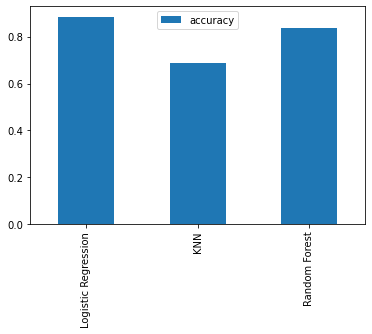

In [30]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

We now have baseline metrics or a model and we can assume that the baseline models predictions are not always the best

Lets look at the follow ideas:

1. Hyperparameter tuning
2. feature importance
3. confusion matrix
4. cross validation
5. precision, recall, f1 score
6. classifiication report
7. roc curve
8. area under roc curve

### hyperparameter tuning (by hand)



In [31]:
# Lets tune KNN:
# can see the editable hyperparameters of the KNN from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

train_scores=[]
test_scores=[]

neighbors = range(1,21)

knn=KNeighborsClassifier()

# loop through number of neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(Xtrain,ytrain)
    
    #update the training scores list
    train_scores.append(knn.score(Xtrain,ytrain))
    
    #update the testing scores list
    test_scores.append(knn.score(Xtest,ytest))
    

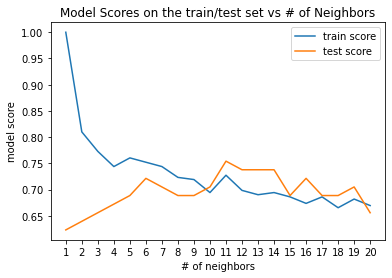

In [35]:
plt.plot(neighbors, train_scores,label="train score")
plt.plot(neighbors,test_scores,label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("# of neighbors")
plt.ylabel("model score")
plt.title("Model Scores on the train/test set vs # of Neighbors")
plt.legend();

### hyperparameter tuning with randomizedsearchcv

We are going to tune:

* logistic regression
* random forest classifier

using randomizedsearchcv

In [43]:
# create a grid for a logistic regression

logistic_reg_grid = {"C":np.logspace(-4,4,20),
                    "solver":["liblinear"]}

# create a hyperparameter grid for randomforestclassifier
random_forest_grid = {"n_estimators":np.arange(10,1000,50),
                     "max_depth": [None,3,5,10],
                     "min_samples_split":np.arange(2,20,2),
                     "min_samples_leaf":np.arange(1,20,2)}

now weve got hyperparameter grid setup for each model, lets tune them using randomizedsearchcv

In [39]:
#tune logistic regression
np.random.seed(42)

rs_logistic_reg = RandomizedSearchCV(LogisticRegression(),
                                    param_distributions=logistic_reg_grid,
                                    cv=5,
                                    n_iter=20,
                                    verbose=True)

rs_logistic_reg.fit(Xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
# get the best parameters from the randomizedsearchcv
rs_logistic_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
# evaluate the model with the best found parameters
rs_logistic_reg.score(Xtest,ytest)

0.8852459016393442

Now we have tuned logistic regression. lets do the same for randomforestclassifier()

In [44]:
# setup random seed
np.random.seed(42)

# setup random hyperparameter seach for randomforestclassifier()
rs_randomforest = RandomizedSearchCV(RandomForestClassifier(),
                                    param_distributions=random_forest_grid,
                                    cv=5,
                                    n_iter=20,
                                    verbose=True)

# fit the random hyperparameter search model for randomforestclassifier()
rs_randomforest.fit(Xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [46]:
# find the best parameters
rs_randomforest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [47]:
#evaluate the model with the best parameters
rs_randomforest.score(Xtest,ytest)

0.8688524590163934

With this gridsearch our randomforest score went up ~3%. Although logistic regression is still the best score on the testing data

Can tune a model:

1. by hand
2. randomizedsearchcv
3. gridsearchcv

## hyperparameter tuning with gridsearchcv

since our logistic regression model provides the best scores so far, we will try to improve them again using gridsearchcv

In [51]:
logistic_reg_grid = {"C":np.logspace(-4,4,20),
                    "solver":["liblinear"]}

gs_logistic_reg = GridSearchCV(LogisticRegression(),
                              param_grid = logistic_reg_grid,
                              cv=5,
                              verbose=True)

gs_logistic_reg.fit(Xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [52]:
# check the best hyperparameters
gs_logistic_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [53]:
# evaluate the grid search on logisticregression model
gs_logistic_reg.score(Xtest,ytest)

0.8852459016393442

The basbeline model is essentially the best model even with gridsearches for the best hyperparameters

## evaluating our tuned machine learning classifier, beyond accuracy

* roc curve and auc score
* confusion matrix
* classification report
* precision
* recall
* f1 score

and it would be great if cross validation was used where possible,
to make comparison and evaluate models we need to first make predictions

In [55]:
ypreds = gs_logistic_reg.predict(Xtest)
ypreds.shape

(61,)

C:\Users\steph\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


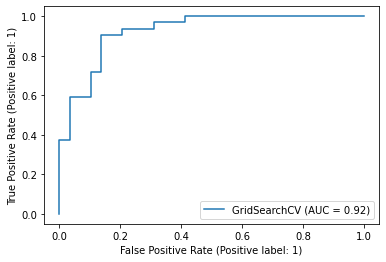

In [58]:
# import roc curve function from sklearn.metrics module
# plot roc curve and calculate area under the curve (auc)

from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_logistic_reg,Xtest,ytest)


area under the score perfect score = 1

area under the score bad score = 0.5

so 0.92 we are doing good

In [60]:
# confusion matrix
print(confusion_matrix(ytest,ypreds))

[[25  4]
 [ 3 29]]


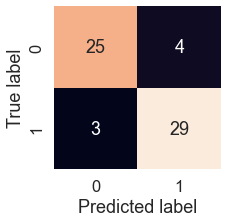

In [62]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    '''
    plots a nice looking confusion matrix using seaborns heatmap()
    '''
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test=ytest, y_preds=ypreds)

now we got a roc curve, auc score, confusion matrix... now lets get a classification report and cross validated precision,recall and f1 score

In [66]:
print(classification_report(ytest,ypreds))

#this is being performed on 1 set of test data. we should get reports of the scores with cross validation scores. 
#see below for that

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross validation


we're going to calculate precision, recall, f1 score of our model using cross validation and to do so well be using cross_val_score

In [67]:
# see the best parameters
gs_logistic_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [70]:
# create a new classifier with the best parameters
clf = LogisticRegression(C=0.23357214690901212,
                         solver = "liblinear")

# cross validation accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc.mean()

0.8479781420765027

In [71]:
# cross validation precision
cv_prec = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_prec.mean()

0.8215873015873015

In [72]:
# cross validation recall
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall.mean()

0.9272727272727274

In [73]:
# cross validation f1 score
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1.mean()

0.8705403543192143

In [80]:
# visualize our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc.mean(),
                          "Precision": cv_prec.mean(),
                          "Recall":cv_recall.mean(),
                          "F1-Score": cv_f1.mean()},
                         index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1-Score
0,0.847978,0.821587,0.927273,0.87054


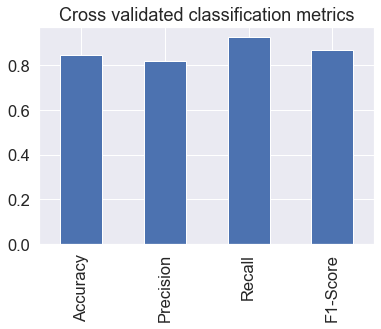

In [86]:
cv_metrics.T.plot.bar(title="Cross validated classification metrics",
                     legend=0,
                    );

### feature importance

feature importance is a way of asking which features contributed most to the outcomes of the model and how did they contribute

finding feature importance is different for each machine learning model

In [87]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
# lets find the feature importance of our logistic regression
gs_logistic_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [89]:
clf = LogisticRegression(C=0.23357214690901212,
                        solver="liblinear")

clf.fit(Xtrain,ytrain)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [90]:
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [92]:
# match coefs features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
                    
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

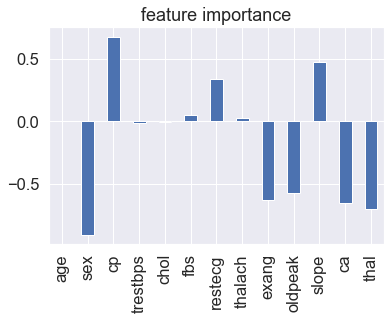

In [94]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance",legend=False);

## 6. experimentation

if you havent hit your evaluation metric (95% accuracy) ask youself
* could u collect more data?
* try a better model? like catboost or xgboost
* could u improve the current model beyond what we've done so far
* 